In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [3]:
class FeedForwardNetwork(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super(FeedForwardNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

transformed = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transformed, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transformed, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = FeedForwardNetwork()
loss_fn = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f"Epochs {epoch}/{epochs} | Loss: {loss.item():.4f}")

# Testing the model
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.shape[0], -1)
        outputs = model(images)
        _, predict = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predict == labels).sum().item()

print(f'Accucracy: {100 * correct / total : .4f} %')

Epochs 0/5 | Loss: 0.4600
Epochs 1/5 | Loss: 0.2223
Epochs 2/5 | Loss: 0.3259
Epochs 3/5 | Loss: 0.2352
Epochs 4/5 | Loss: 0.0216
Accucracy:  96.8200 %


Perdicted Labels: 3  | Actual Labels: 3


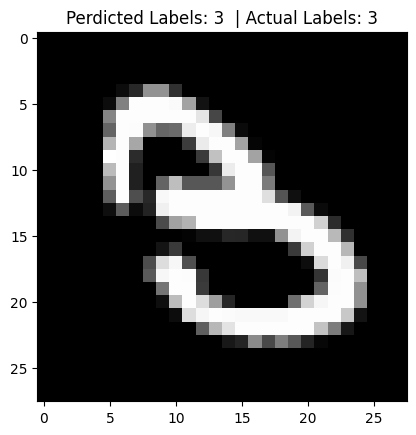

In [21]:
import matplotlib.pyplot as plt 
import random

data_iter = iter(test_loader)
images, labels = next(data_iter)

index = random.randint(1, 30)
image = images[index]
label = labels[index].item() # Convert tensors to intergers

img_for_model = image.view(1, 784) # flatten image

with torch.no_grad():
    outputs = model(img_for_model)
    _, predict = torch.max(outputs, 1)

print(f'Perdicted Labels: {predict.item()}  | Actual Labels: {label}')

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Perdicted Labels: {predict.item()}  | Actual Labels: {label}')
plt.show()


In [15]:
a = random.randint(1, 4)
a

3

In [23]:
# Saving the model -
from safetensors.torch import save_file

model_state = model.state_dict()
save_file(model_state, './Models/FFN-DigitRecogination.safetensors')
print('Model Sucessfully Saved!')

Model Sucessfully Saved!
